# Visualization

### Requierement : 
Need to use the new dataset which has been upgraded with coherent date format. 
The new metadata file should be named "*metadata_new.csv*" (automatic if running new_dates.py)

In [1]:
from os.path import join as ospj
import os
import sys
import pandas as pd
import numpy as np
import sys
print(sys.version)
from IPython.display import display, HTML
import matplotlib.pyplot as plt


3.6.10 (default, Dec 19 2019, 23:04:32) 
[GCC 5.4.0 20160609]


In [5]:
pd.set_option('display.max_rows', 10)

data_path = '/home/marchaln/CodeVsCovid19/data/metadata.csv'
data_path = '../data'
download_path = '/home/marchaln/Downloads'

metadata_path = ospj(data_path, 'metadata.csv')
new_metadata_path = ospj(data_path, 'metadata_new.csv')


In [7]:
metadata_pd = pd.read_csv(new_metadata_path)  
display(metadata_pd)

,Unnamed: 0,cord_uid,sha,source_x,title,doi,pmcid,pubmed_id,license,abstract,publish_time,authors,journal,Microsoft Academic Paper ID,WHO #Covidence,has_full_text,full_text_file,url
0,0,vho70jcx,f056da9c64fbf00a4645ae326e8a4339d015d155,biorxiv,SIANN: Strain Identification by Alignment to N...,10.1101/001727,NaN,NaN,biorxiv,Next-generation sequencing is increasingly bei...,2014-01-10,Samuel Minot; Stephen D Turner; Krista L Ternu...,NaN,NaN,NaN,True,biorxiv_medrxiv,https://doi.org/10.1101/001727
1,1,i9tbix2v,daf32e013d325a6feb80e83d15aabc64a48fae33,biorxiv,Spatial epidemiology of networked metapopulati...,10.1101/003889,NaN,NaN,biorxiv,An emerging disease is one infectious epidemic...,2014-06-04,Lin WANG; Xiang Li,NaN,NaN,NaN,True,biorxiv_medrxiv,https://doi.org/10.1101/003889
2,2,62gfisc6,f33c6d94b0efaa198f8f3f20e644625fa3fe10d2,biorxiv,Sequencing of the human IG light chain loci fr...,10.1101/006866,NaN,NaN,biorxiv,Germline variation at immunoglobulin gene (IG)...,2014-07-03,Corey T Watson; Karyn Meltz Steinberg; Tina A ...,NaN,NaN,NaN,True,biorxiv_medrxiv,https://doi.org/10.1101/006866
3,3,058r9486,4da8a87e614373d56070ed272487451266dce919,biorxiv,Bayesian mixture analysis for metagenomic comm...,10.1101/007476,NaN,NaN,biorxiv,Deep sequencing of clinical samples is now an ...,2014-07-25,Sofia Morfopoulou; Vincent Plagnol,NaN,NaN,NaN,True,biorxiv_medrxiv,https://doi.org/10.1101/007476
4,4,wich35l7,eccef80cfbe078235df22398f195d5db462d8000,biorxiv,Mapping a viral phylogeny onto outbreak trees ...,10.1101/010389,NaN,NaN,biorxiv,Developing methods to reconstruct transmission...,2014-11-11,Stephen P Velsko; Jonathan E Allen,NaN,NaN,NaN,True,biorxiv_medrxiv,https://doi.org/10.1101/010389
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45769,45769,4360s2yu,289deae0b2050aa259a05ba84565a4df82fa099a,Elsevier,Personal Protective Equipment: Protecting Heal...,10.1016/j.clinthera.2015.07.007,PMC4661082,26452427.0,els-covid,Abstract Purpose The recent Ebola epidemic tha...,2015-11-01,"Fischer, William A.; Weber, David J.; Wohl, Da...",Clinical Therapeutics,NaN,NaN,True,custom_license,https://doi.org/10.1016/j.clinthera.2015.07.007
45770,45770,66jumbir,21a4369f83891bf6975dd916c0aa495d5df8709e,Elsevier,Viruses and asthma,10.1016/j.bbagen.2011.01.012,PMC3130828,21291960.0,els-covid,Abstract Background Viral respiratory infectio...,2011-11-30,"Dulek, Daniel E.; Peebles, R. Stokes",Biochimica et Biophysica Acta (BBA) - General ...,NaN,NaN,True,custom_license,https://doi.org/10.1016/j.bbagen.2011.01.012
45771,45771,3wk36h9p,NaN,Elsevier,Why the WHO won't use the p-word,10.1016/s0262-4079(20)30474-7,NaN,NaN,els-covid,"There are no criteria for a pandemic, but covi...",2020-03-07,"MacKenzie, Debora",New Scientist,NaN,#5716,False,custom_license,https://doi.org/10.1016/s0262-4079(20)30474-7
45772,45772,0ujw0gak,NaN,WHO,"Communication, transparency key as Canada face...",10.1503/cmaj.1095846,PMC7030882,32071113.0,unk,NaN,2020-02-17,"Glauser, Wendy",Canadian Medical Association Journal,1.953688e+09,#4117,False,NaN,https://doi.org/10.1503/cmaj.1095846


In [4]:
df = metadata_pd
year = pd.DataFrame()
year['publish_time'] = df['publish_time']
year['year'] = year['publish_time'].str[:4]

unique_years = sorted(year['year'].unique())
min_year = int(unique_years[1]) #ignore the 00
max_year = int(max(unique_years))


unique_numbers = []
all_date = []

for date in range(min_year, max_year+1):
    nbr =  len(year[year['year'] == str(date)])
    unique_numbers.append(nbr)
    all_date.append(date)

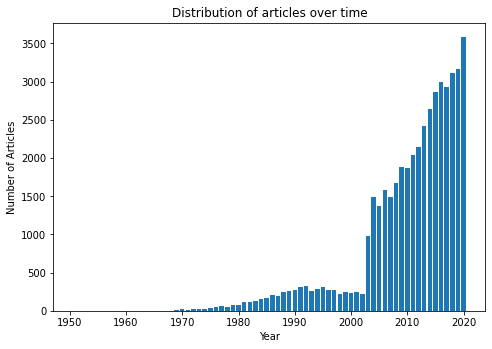

In [5]:
1243fig = plt.figure()

# draw the plot
ax = fig.add_axes([0,0,1,1])
ax.bar(all_date,unique_numbers)

# Add title and axis names
plt.title('Distribution of articles over time')
plt.xlabel('Year')
plt.ylabel('Number of Articles')

#uncomment to save where you want
#plt.savefig(ospj(download_path, 'dates.png'), bbox_inches='tight')

plt.show()
